In [2]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from IPython.display import display




In [5]:
file_id = '1ZqKrTx4Ntwaa6VVdEFxrUQJlHjIKrEVP'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(download_url)

In [6]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,ID_Nasabah,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata
0,717574683,53.0,Perempuan,3,NaN,Menikah,44280.0,Biru,46,6,2192.0,1146,4756,85,0.523
1,769662033,45.0,Perempuan,2,Kuliah,NaN,9982.0,Biru,29,2,1438.3,0,5025,85,0.000
2,719377383,40.0,Laki-Laki,2,Kuliah,Belum Menikah,64988.0,Biru,28,1,10880.0,2025,4957,90,0.186
3,820657083,53.0,Laki-Laki,4,Kuliah,Belum Menikah,117549.0,Perak,48,5,34516.0,800,3819,72,0.023
4,709836258,45.0,Perempuan,4,Sarjana,Menikah,21579.0,Biru,41,5,1927.0,1337,5127,81,0.694


In [7]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_Nasabah                  1050 non-null   int64  
 1   Usia_Nasabah                1000 non-null   float64
 2   Jenis_Kelamin               1050 non-null   object 
 3   Jumlah_Tanggungan           1050 non-null   int64  
 4   Tingkat_Pendidikan          883 non-null    object 
 5   Status_Pernikahan           976 non-null    object 
 6   Pendapatan                  932 non-null    float64
 7   Kategori_Kartu              1050 non-null   object 
 8   Lama_Menjadi_Nasabah        1050 non-null   int64  
 9   Jumlah_Layanan              1050 non-null   int64  
 10  Limit_Kredit                1050 non-null   float64
 11  Saldo_Revolting_Total       1050 non-null   int64  
 12  Total_Transaksi             1050 non-null   int64  
 13  Jumlah_Melakukan_Transaksi  1050 

In [8]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,ID_Nasabah,Usia_Nasabah,Jumlah_Tanggungan,Pendapatan,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata
count,1.050000e+03,1000.000000,1050.00000,932.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,7.407498e+08,46.176000,2.34381,59609.144850,36.097143,3.965714,8367.464762,1235.982857,4609.471429,67.786667,0.293375
std,3.804229e+07,7.954892,1.25374,42907.053422,8.156950,1.543388,8568.071306,776.468412,3502.326551,23.190516,0.272499
min,7.081287e+08,26.000000,0.00000,159.000000,13.000000,1.000000,1438.300000,0.000000,933.000000,13.000000,0.000000
25%,7.135474e+08,41.000000,1.00000,26533.500000,32.000000,3.000000,2615.500000,772.250000,2262.000000,51.000000,0.050000
50%,7.180074e+08,46.000000,2.00000,52277.500000,36.000000,4.000000,4704.500000,1358.000000,4070.500000,70.000000,0.215000
75%,7.787832e+08,52.000000,3.00000,81855.250000,41.000000,5.000000,10986.500000,1797.500000,4770.000000,82.000000,0.531750
max,8.282361e+08,65.000000,5.00000,199010.000000,56.000000,6.000000,34516.000000,2517.000000,17995.000000,139.000000,0.962000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [9]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
df.select_dtypes(include=['number']).corr()

,ID_Nasabah,Usia_Nasabah,Jumlah_Tanggungan,Pendapatan,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata
ID_Nasabah,1.000000,-0.010691,0.028131,0.006356,0.147720,0.023749,0.002854,-0.074322,-0.036268,-0.013139,-0.019614
Usia_Nasabah,-0.010691,1.000000,-0.127462,0.056821,0.799717,0.063981,-0.041936,-0.011591,-0.079604,-0.085333,-0.008349
Jumlah_Tanggungan,0.028131,-0.127462,1.000000,0.071125,-0.102544,-0.111647,0.122841,0.032210,0.041333,0.099772,0.001469
Pendapatan,0.006356,0.056821,0.071125,1.000000,0.053316,0.006122,0.522379,0.046108,0.028507,-0.024671,-0.294515
Lama_Menjadi_Nasabah,0.147720,0.799717,-0.102544,0.053316,1.000000,0.052210,-0.015497,-0.022879,-0.082815,-0.075357,-0.021477
Jumlah_Layanan,0.023749,0.063981,-0.111647,0.006122,0.052210,1.000000,-0.070035,-0.041677,-0.386312,-0.378623,0.037585
Limit_Kredit,0.002854,-0.041936,0.122841,0.522379,-0.015497,-0.070035,1.000000,0.034299,0.202291,0.114571,-0.522515
Saldo_Revolting_Total,-0.074322,-0.011591,0.032210,0.046108,-0.022879,-0.041677,0.034299,1.000000,0.019954,-0.061614,0.617595
Total_Transaksi,-0.036268,-0.079604,0.041333,0.028507,-0.082815,-0.386312,0.202291,0.019954,1.000000,0.821089,-0.141233
Jumlah_Melakukan_Transaksi,-0.013139,-0.085333,0.099772,-0.024671,-0.075357,-0.378623,0.114571,-0.061614,0.821089,1.000000,-0.116283


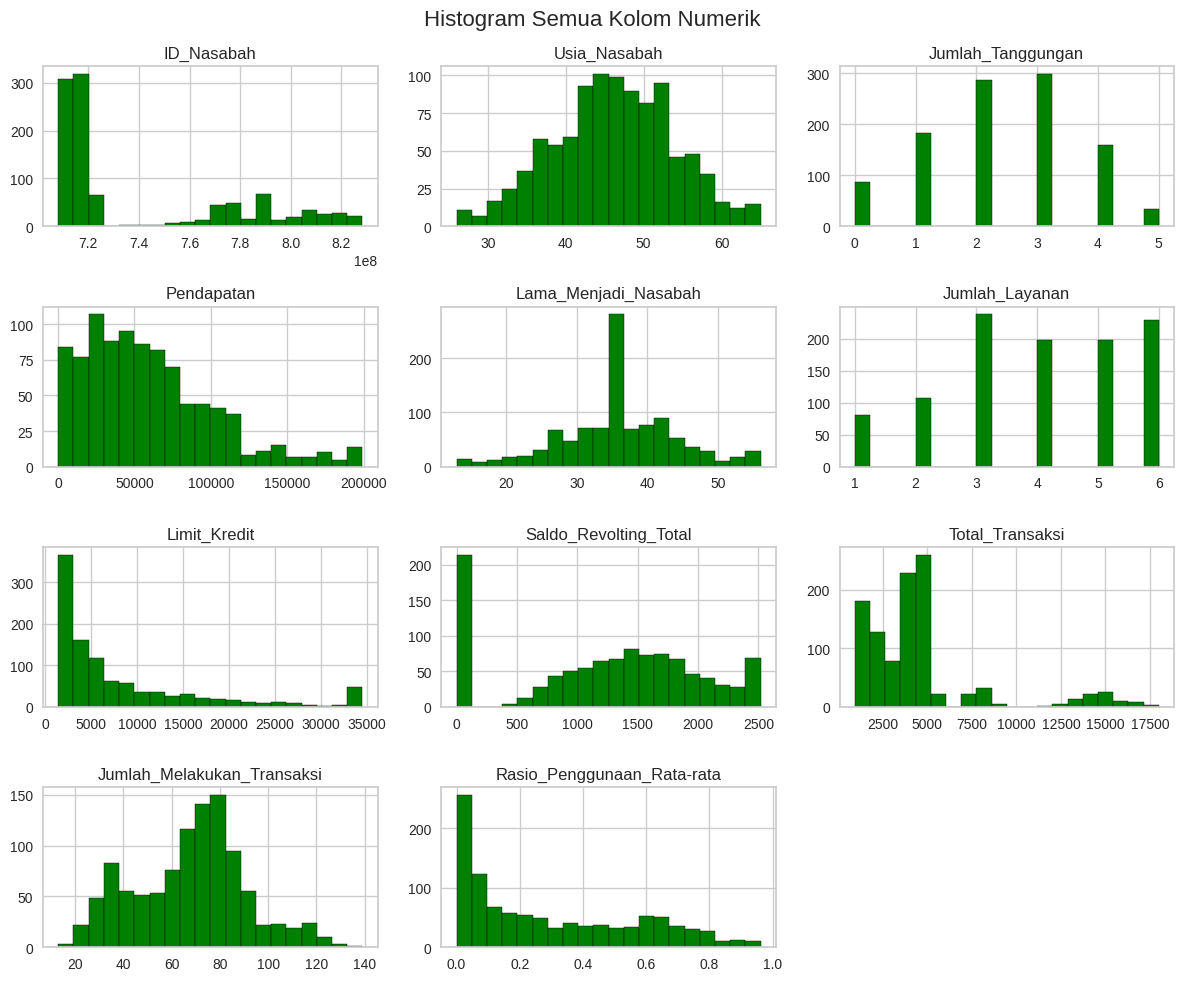

In [12]:
# Menampilkan histogram untuk semua kolom numerik
df.select_dtypes(include='number').hist(
    figsize=(12, 10),
    bins=20,
    color='green',
    edgecolor='black'
)

plt.suptitle("Histogram Semua Kolom Numerik", fontsize=16)
plt.tight_layout()
plt.show()

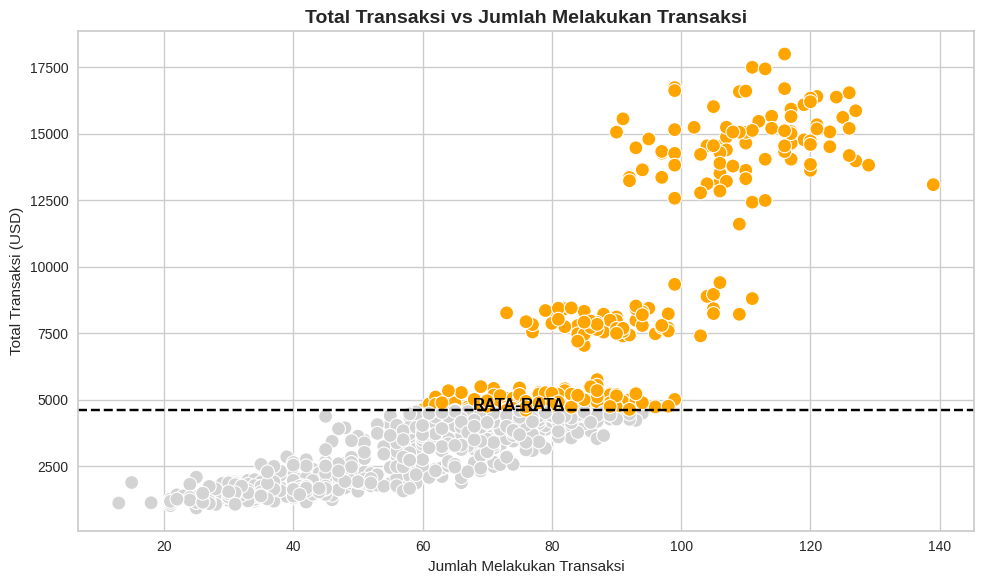

In [14]:
# Drop NaN jika ada
df = df.dropna(subset=['Total_Transaksi', 'Jumlah_Melakukan_Transaksi']).copy()

# Hitung rata-rata transaksi
rata2 = df['Total_Transaksi'].mean()

# Tandai warna berdasarkan apakah di atas atau di bawah rata-rata
df['Warna'] = df['Total_Transaksi'].apply(lambda x: 'orange' if x > rata2 else 'lightgray')

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Jumlah_Melakukan_Transaksi',
    y='Total_Transaksi',
    hue='Warna',
    palette={'orange': 'orange', 'lightgray': 'lightgray'},
    s=100,
    legend=False
)

# Tambahkan garis rata-rata
plt.axhline(y=rata2, color='black', linestyle='--')
plt.text(
    x=df['Jumlah_Melakukan_Transaksi'].mean(),
    y=rata2 + 10,
    s='RATA-RATA',
    fontweight='bold',
    color='black'
)

# Label dan judul
plt.title('Total Transaksi vs Jumlah Melakukan Transaksi', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Melakukan Transaksi')
plt.ylabel('Total Transaksi (USD)')
plt.tight_layout()
plt.show()


In [15]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
ID_Nasabah,0
Usia_Nasabah,50
Jenis_Kelamin,0
Jumlah_Tanggungan,0
Tingkat_Pendidikan,167
Status_Pernikahan,74
Pendapatan,118
Kategori_Kartu,0
Lama_Menjadi_Nasabah,0
Jumlah_Layanan,0


In [16]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(0)

In [17]:
df_inverse = df.copy()

In [18]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
num_cols = df.select_dtypes(include='number').columns.drop('Target', errors='ignore')

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[num_cols])
df[num_cols] = df_scaled

df[num_cols].head()

,ID_Nasabah,Usia_Nasabah,Jumlah_Tanggungan,Pendapatan,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata
0,0.078646,0.692308,0.6,0.221880,0.767442,1.0,0.022786,0.455304,0.224065,0.571429,0.543659
1,0.512319,0.487179,0.4,0.049399,0.372093,0.2,0.000000,0.000000,0.239831,0.571429,0.000000
2,0.093655,0.358974,0.4,0.326018,0.348837,0.0,0.285440,0.804529,0.235846,0.611111,0.193347
3,0.936898,0.692308,0.8,0.590342,0.813953,0.8,1.000000,0.317839,0.169148,0.468254,0.023909
4,0.014217,0.487179,0.8,0.107719,0.651163,0.8,0.014774,0.531188,0.245809,0.539683,0.721414


In [19]:
# Drop kolom ID yang tidak dibutuhkan untuk analisis
df = df.drop(['ID_Nasabah'], axis=1)
df.head()


,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata,Warna
0,0.692308,Perempuan,0.6,NaN,Menikah,0.221880,Biru,0.767442,1.0,0.022786,0.455304,0.224065,0.571429,0.543659,orange
1,0.487179,Perempuan,0.4,Kuliah,NaN,0.049399,Biru,0.372093,0.2,0.000000,0.000000,0.239831,0.571429,0.000000,orange
2,0.358974,Laki-Laki,0.4,Kuliah,Belum Menikah,0.326018,Biru,0.348837,0.0,0.285440,0.804529,0.235846,0.611111,0.193347,orange
3,0.692308,Laki-Laki,0.8,Kuliah,Belum Menikah,0.590342,Perak,0.813953,0.8,1.000000,0.317839,0.169148,0.468254,0.023909,lightgray
4,0.487179,Perempuan,0.8,Sarjana,Menikah,0.107719,Biru,0.651163,0.8,0.014774,0.531188,0.245809,0.539683,0.721414,orange


In [56]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
# Ambil kolom kategorikal (tipe object)
cat_cols = df.select_dtypes(include='object').columns
encoders = {}

# Process encoding and refit encoders after outlier removal
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder


# Tampilkan hasil encoding awal
df[cat_cols].head()

,Jenis_Kelamin,Tingkat_Pendidikan,Status_Pernikahan,Kategori_Kartu
0,1,6,2,0
1,1,1,3,0
2,0,1,0,0
4,1,4,2,0
5,1,4,1,0


In [21]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['Usia_Nasabah',
 'Jenis_Kelamin',
 'Jumlah_Tanggungan',
 'Tingkat_Pendidikan',
 'Status_Pernikahan',
 'Pendapatan',
 'Kategori_Kartu',
 'Lama_Menjadi_Nasabah',
 'Jumlah_Layanan',
 'Limit_Kredit',
 'Saldo_Revolting_Total',
 'Total_Transaksi',
 'Jumlah_Melakukan_Transaksi',
 'Rasio_Penggunaan_Rata-rata',
 'Warna']

In [22]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()


,0
Usia_Nasabah,0
Jenis_Kelamin,0
Jumlah_Tanggungan,0
Tingkat_Pendidikan,0
Status_Pernikahan,0
Pendapatan,0
Kategori_Kartu,0
Lama_Menjadi_Nasabah,0
Jumlah_Layanan,0
Limit_Kredit,0


In [23]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [24]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[mask].copy()

df.shape

(795, 15)

In [26]:
# Binning Usia_Nasabah menjadi kelompok umur
bins_usia = [0, 25, 45, 65, 100]
label_usia = ['Muda', 'Dewasa', 'Paruh Baya', 'Lansia']
df['Kelompok_Usia'] = pd.cut(df['Usia_Nasabah'], bins=bins_usia, labels=label_usia)

# Binning Total_Transaksi menjadi ukuran transaksi
bins_transaksi = [0, df['Total_Transaksi'].quantile(0.33), df['Total_Transaksi'].quantile(0.66), df['Total_Transaksi'].max()]
label_transaksi = ['Kecil', 'Sedang', 'Besar']
df['Ukuran_Transaksi'] = pd.cut(df['Total_Transaksi'], bins=bins_transaksi, labels=label_transaksi, include_lowest=True)

# Encode hasil binning
le = LabelEncoder()
df['Kelompok_Usia'] = le.fit_transform(df['Kelompok_Usia'])
df['Ukuran_Transaksi'] = le.fit_transform(df['Ukuran_Transaksi'])

# Tampilkan hasil
df[['Usia_Nasabah', 'Kelompok_Usia', 'Total_Transaksi', 'Ukuran_Transaksi']].head()


,Usia_Nasabah,Kelompok_Usia,Total_Transaksi,Ukuran_Transaksi
0,0.692308,0,0.224065,0
1,0.487179,0,0.239831,0
2,0.358974,0,0.235846,0
4,0.487179,0,0.245809,0
5,0.512821,0,0.185324,2


In [27]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata,Warna,Kelompok_Usia,Ukuran_Transaksi
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.0,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000
mean,0.523464,0.567296,0.476981,3.691824,1.281761,0.255583,0.0,0.544069,0.618365,0.126274,0.484314,0.158403,0.402146,0.350099,0.252830,0.001258,0.989937
std,0.184746,0.495763,0.244044,1.612880,1.040058,0.156937,0.0,0.164766,0.294731,0.141514,0.312702,0.092674,0.154863,0.290567,0.434908,0.035466,0.818489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.139535,0.000000,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000
25%,0.410256,0.000000,0.400000,3.000000,0.000000,0.133668,0.0,0.441860,0.400000,0.030540,0.290624,0.066229,0.273810,0.079522,0.000000,0.000000,0.000000
50%,0.512821,1.000000,0.400000,4.000000,2.000000,0.262098,0.0,0.534884,0.600000,0.064113,0.531188,0.181221,0.444444,0.293139,0.000000,0.000000,1.000000
75%,0.666667,1.000000,0.600000,5.000000,2.000000,0.340275,0.0,0.651163,0.800000,0.174217,0.713349,0.215537,0.523810,0.617464,1.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,6.000000,3.000000,0.734756,0.0,0.953488,1.000000,0.652817,1.000000,0.440218,0.761905,1.000000,1.000000,1.000000,2.000000


/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


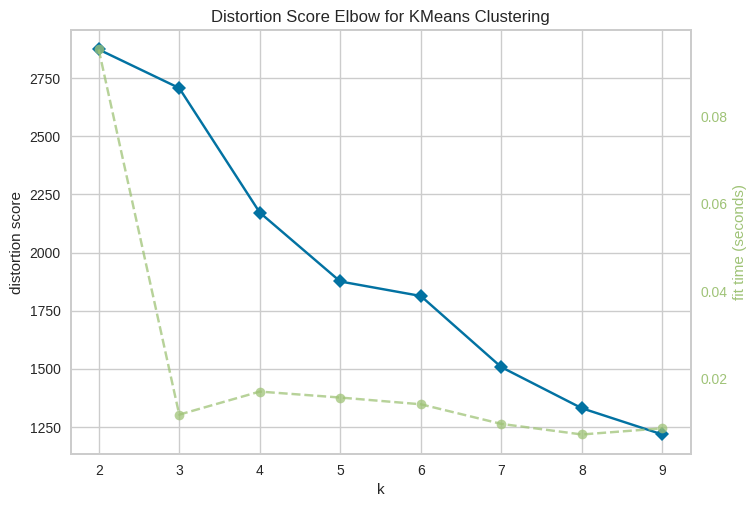

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df.select_dtypes(include='number')
model = KMeans(random_state=42)
elbow = KElbowVisualizer(model, k=(2, 10))
elbow.fit(X)
elbow.show()

In [42]:
# Menggunakan algoritma K-Means Clustering
# Pilih kolom numerik yang akan digunakan untuk clustering
numerical_cols = [
    'Usia_Nasabah',
    'Pendapatan',
    'Limit_Kredit',
    'Total_Transaksi',
    'Rasio_Penggunaan_Rata-rata',
    'Jumlah_Tanggungan',
    'Lama_Menjadi_Nasabah',
    'Jumlah_Layanan',
    'Saldo_Revolting_Total',
    'Jumlah_Melakukan_Transaksi'
]

# Drop baris yang mengandung NaN di kolom terpilih (jika ada)
X = df[numerical_cols].dropna()

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

df.loc[X.index, 'cluster'] = clusters

print(df['cluster'].value_counts().sort_index())

cluster
0.0    199
1.0    203
2.0    191
3.0    202
Name: count, dtype: int64


In [30]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

In [31]:
# Menghitung dan menampilkan nilai Silhouette Score.
X = df.select_dtypes(include='number')
score = silhouette_score(X, df['cluster'])
score

np.float64(0.07034929699385492)

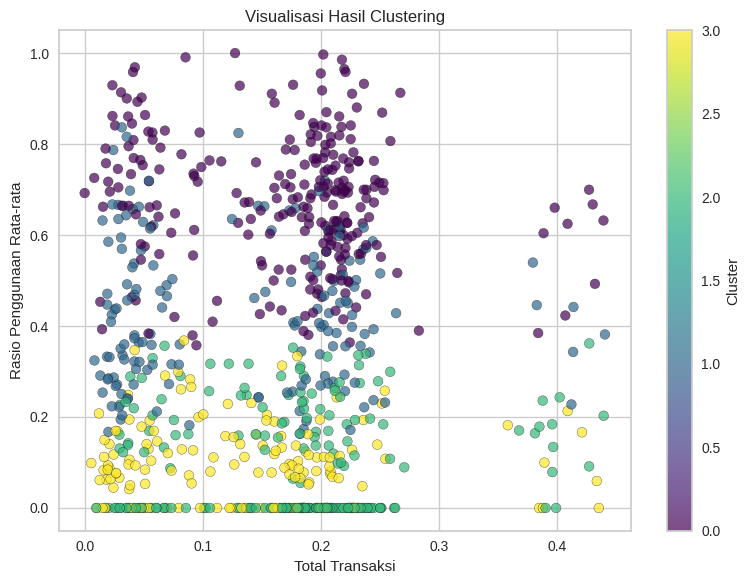

In [32]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df['Total_Transaksi'],
    df['Rasio_Penggunaan_Rata-rata'],
    c=df['cluster'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)
plt.title("Visualisasi Hasil Clustering")
plt.xlabel("Total Transaksi")
plt.ylabel("Rasio Penggunaan Rata-rata")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()



In [33]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.select_dtypes(include='number'))
data_final = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(data_final)



KMeans(n_clusters=4, random_state=42)

In [34]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

In [35]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df.groupby('cluster').agg(['mean', 'min', 'max', 'median', 'std'])

Usia_Nasabah                                         Jenis_Kelamin  \
                mean       min       max    median       std          mean   
cluster                                                                      
0.0         0.446631  0.000000  0.820513  0.461538  0.158311      0.775194   
1.0         0.701067  0.333333  1.000000  0.692308  0.136859      0.490683   
2.0         0.520147  0.102564  0.923077  0.512821  0.165388      0.669643   
3.0         0.470648  0.025641  0.923077  0.461538  0.173289      0.144737   

                                  ... Kelompok_Usia                           \
        min max median       std  ...          mean min max median       std   
cluster                           ...                                          
0.0       0   1    1.0  0.418266  ...      0.003876   0   1    0.0  0.062257   
1.0       0   1    0.0  0.501473  ...      0.000000   0   0    0.0  0.000000   
2.0       0   1    1.0  0.471395  ...      0.000000   0   0    0.0  0.000000   
3.0       0   1    0.0  0.352998  ...      0.000000   0   0    0.0  0.000000   

        Ukuran_Transaksi                           
                    mean min max median       std  
cluster                                            
0.0             0.899225   0   2    1.0  0.853876  
1.0             0.944099   0   2    1.0  0.718057  
2.0             0.986607   0   2    1.0  0.880684  
3.0             1.197368   0   2    1.0  0.728234  

[4 rows x 85 columns]

In [36]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'cluster': 'Target'}, inplace=True)

In [37]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

In [54]:
df_scaled = df.copy()
numerical_cols = [
    'Usia_Nasabah',
    'Pendapatan',
    'Limit_Kredit',
    'Total_Transaksi',
    'Rasio_Penggunaan_Rata-rata',
    'Jumlah_Tanggungan',
    'Lama_Menjadi_Nasabah',
    'Jumlah_Layanan',
    'Saldo_Revolting_Total',
    'Jumlah_Melakukan_Transaksi'
]

scaler = MinMaxScaler()
scaler.fit(df_scaled[numerical_cols])

df_scaled[numerical_cols] = scaler.inverse_transform(df_scaled[numerical_cols])
display(df_scaled.head())

,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata,Warna,Kelompok_Usia,Ukuran_Transaksi,Target,cluster
0,0.692308,Perempuan,0.6,NaN,Menikah,0.163027,Biru,0.764197,1.0,0.014875,0.455304,0.098638,0.442177,0.543659,1,0,0,1.0,0.0
1,0.487179,Perempuan,0.4,Kuliah,NaN,0.036296,Biru,0.442401,0.2,0.000000,0.000000,0.105578,0.442177,0.000000,1,0,0,2.0,1.0
2,0.358974,Laki-Laki,0.4,Kuliah,Belum Menikah,0.239544,Biru,0.423472,0.0,0.186340,0.804529,0.103824,0.471781,0.193347,1,0,0,3.0,3.0
4,0.487179,Perempuan,0.8,Sarjana,Menikah,0.079147,Biru,0.669551,0.8,0.009645,0.531188,0.108210,0.418493,0.721414,1,0,0,0.0,0.0
5,0.512821,Perempuan,0.4,Sarjana,Bercerai,0.192578,Biru,0.328826,1.0,0.333412,0.546683,0.081583,0.335601,0.077963,0,0,2,3.0,2.0


In [57]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
categorical_cols = [
    'Jenis_Kelamin',
    'Tingkat_Pendidikan',
    'Status_Pernikahan',
    'Kategori_Kartu'
]

for col in categorical_cols:
    df[col] = encoders[col].inverse_transform(df[col].astype(int))

df[categorical_cols].head()

,Jenis_Kelamin,Tingkat_Pendidikan,Status_Pernikahan,Kategori_Kartu
0,Perempuan,NaN,Menikah,Biru
1,Perempuan,Kuliah,NaN,Biru
2,Laki-Laki,Kuliah,Belum Menikah,Biru
4,Perempuan,Sarjana,Menikah,Biru
5,Perempuan,Sarjana,Bercerai,Biru


In [59]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
# Agregasi untuk fitur numerik: mean, min, max
numerical_cols = [
    'Usia_Nasabah',
    'Pendapatan',
    'Limit_Kredit',
    'Total_Transaksi',
    'Rasio_Penggunaan_Rata-rata',
    'Jumlah_Tanggungan',
    'Lama_Menjadi_Nasabah',
    'Jumlah_Layanan',
    'Saldo_Revolting_Total',
    'Jumlah_Melakukan_Transaksi'
]
categorical_cols = ['Jenis_Kelamin', 'Tingkat_Pendidikan', 'Status_Pernikahan', 'Kategori_Kartu']

# Inverse numerik
# df[numerical_cols] = scaler.inverse_transform(df[numerical_cols]) # This line was causing issues in previous attempts and is not needed here as inverse transformation was done in OMcRV15y_hH3

# Inverse kategorikal
# This inverse transformation was done in wzIddcB6XjrC and is not needed here
# for col in categorical_cols:
#     if df[col].dtype != 'object':
#         df[col] = encoders[col].inverse_transform(df[col].astype(int))

# Agregasi global
agg_numeric = df[numerical_cols].agg(['mean', 'min', 'max']).T
agg_categorical = df[categorical_cols].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A').to_frame(name='mode')
agg_summary = pd.concat([agg_numeric, agg_categorical], axis=0)

# Agregasi groupby berdasarkan Target
grouped_numeric = df.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])
grouped_categorical = df.groupby('Target')[categorical_cols].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A')

# Tampilkan
display(agg_summary)
display(grouped_numeric)
display(grouped_categorical)

,mean,min,max,mode
Usia_Nasabah,0.523464,0.000000,1.000000,NaN
Pendapatan,0.255583,0.000000,0.734756,NaN
Limit_Kredit,0.126274,0.000000,0.652817,NaN
Total_Transaksi,0.158403,0.000000,0.440218,NaN
Rasio_Penggunaan_Rata-rata,0.350099,0.000000,1.000000,NaN
Jumlah_Tanggungan,0.476981,0.000000,1.000000,NaN
Lama_Menjadi_Nasabah,0.544069,0.139535,0.953488,NaN
Jumlah_Layanan,0.618365,0.000000,1.000000,NaN
Saldo_Revolting_Total,0.484314,0.000000,1.000000,NaN
Jumlah_Melakukan_Transaksi,0.402146,0.015873,0.761905,NaN


Usia_Nasabah                     Pendapatan                      \
               mean       min       max       mean       min       max   
Target                                                                   
0.0        0.446631  0.000000  0.820513   0.185804  0.000000  0.734756   
1.0        0.701067  0.333333  1.000000   0.287999  0.003334  0.732448   
2.0        0.520147  0.102564  0.923077   0.196001  0.001765  0.488381   
3.0        0.470648  0.025641  0.923077   0.427495  0.204118  0.730607   

       Limit_Kredit                     Total_Transaksi  ...  \
               mean       min       max            mean  ...   
Target                                                   ...   
0.0        0.034732  0.000000  0.111426        0.171387  ...   
1.0        0.085734  0.000000  0.279938        0.131419  ...   
2.0        0.105879  0.000000  0.325769        0.177246  ...   
3.0        0.354651  0.043827  0.652817        0.137176  ...   

       Lama_Menjadi_Nasabah Jumlah_Layanan           Saldo_Revolting_Total  \
                        max           mean  min  max                  mean   
Target                                                                       
0.0                0.930233       0.597674  0.0  1.0              0.666274   
1.0                0.953488       0.631056  0.0  1.0              0.624109   
2.0                0.953488       0.597321  0.0  1.0              0.210501   
3.0                0.953488       0.671053  0.0  1.0              0.430901   

                      Jumlah_Melakukan_Transaksi                      
             min  max                       mean       min       max  
Target                                                                
0.0     0.196663  1.0                   0.423250  0.015873  0.761905  
1.0     0.214541  1.0                   0.349502  0.071429  0.714286  
2.0     0.000000  1.0                   0.442212  0.079365  0.730159  
3.0     0.000000  1.0                   0.363043  0.063492  0.619048  

[4 rows x 30 columns]

,Jenis_Kelamin,Tingkat_Pendidikan,Status_Pernikahan,Kategori_Kartu
Target,,,,
0.0,Perempuan,Sarjana,Menikah,Biru
1.0,Laki-Laki,Sarjana,Menikah,Biru
2.0,Perempuan,Sarjana,Menikah,Biru
3.0,Laki-Laki,Sarjana,Belum Menikah,Biru


In [60]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse = df.copy()
df_inverse = df_inverse.reset_index(drop=True)

df_scaled = scaler.fit_transform(df[numerical_cols])
model_kmeans = KMeans(n_clusters=4, random_state=42)
model_kmeans.fit(df_scaled)

df_inverse['Target'] = model_kmeans.labels_

from IPython.display import display
display(df_inverse.head())


,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata,Warna,Kelompok_Usia,Ukuran_Transaksi,Target,cluster
0,0.692308,Perempuan,0.6,NaN,Menikah,0.221880,Biru,0.767442,1.0,0.022786,0.455304,0.224065,0.571429,0.543659,1,0,0,0,0.0
1,0.487179,Perempuan,0.4,Kuliah,NaN,0.049399,Biru,0.372093,0.2,0.000000,0.000000,0.239831,0.571429,0.000000,1,0,0,1,1.0
2,0.358974,Laki-Laki,0.4,Kuliah,Belum Menikah,0.326018,Biru,0.348837,0.0,0.285440,0.804529,0.235846,0.611111,0.193347,1,0,0,2,3.0
3,0.487179,Perempuan,0.8,Sarjana,Menikah,0.107719,Biru,0.651163,0.8,0.014774,0.531188,0.245809,0.539683,0.721414,1,0,0,0,0.0
4,0.512821,Perempuan,0.4,Sarjana,Bercerai,0.262098,Biru,0.232558,1.0,0.510728,0.546683,0.185324,0.428571,0.077963,0,0,2,3,2.0


In [61]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.